# 0316REPORT：Test on different input data format of Transformer model

## Model introduction

The model is construct based on transformer model's encoder mudule. The Encoder module is used to encode the input sequence into a series of representations for use by subsequent modules. It is stacked by multiple identical layers, and each layer usually consists of two sub-layers: Self-Attention Layer and Feedforward Neural Network. 

The self-attention layer is an important component in the Encoder. It is able to compute a context-sensitive representation for each position in the input sequence. The self-attention mechanism allows the model to model the dependencies between different positions when processing the input sequence, thereby better capturing long-distance dependencies in the sequence. At each position, the self-attention layer computes a weighted representation that takes into account information from all other positions in the input sequence. 

In the self-attention layer, the dimensions of the query, key, and value are usually the same and the same as the dimensions of the input sequence. Assuming that the length of the input sequence is N and the feature dimension of each position is d, the dimensions of the query, key and value are (N, d). Here we also apply multihead self attension mechanism. It maps the input sequence into multiple subspaces and calculates attention weights in each subspace. Finally, the attention-weighted representations of multiple subspaces are combined to obtain the final output representation. The number of head is H.

After the self-attention layer, the Encoder module usually contains a feedforward neural network layer. This feedforward neural network layer usually consists of two linear transformations and a nonlinear activation function, such as ReLU. It acts on the representation at each position and performs non-linear transformation and mapping on the representation, thereby enhancing the expressive ability ofthe model.

The number of model parameter is mainly depend on d and k. For k, we can direct adjust it. For d, we should alter it by different input data format.


## Algorithm

To minimize loss function by backward propogation, we used algorithm Adam. Adam (Adaptive Moment Estimation) is an adaptive learning rate optimization algorithm that combines the characteristics of the momentum method and adaptive learning rate adjustment. It can effectively adjust the learning rate and adaptively adjust the learning rate of each parameter during the train

The Adam algorithm uses the concept of momentum to speed up the gradient descent process. It considers not only the direction of the current gradient but also the direction of previous gradients when updating parameters. This allows for faster movement in parameter space and can help overcome local minima. The Adam algorithm also introduces the concept of adaptive learning rate. It maintains an adaptive learning rate for each parameter, which is adjusted based on the first moment estimate (mean) and second moment estimate (variance) of the parameter's gradient. This allows the learning rate of each parameter to dynamically adapt to parameter updates during the training process.

When using the Adam optimizer in PyTorch, we can adjust several parameters to achieve better performance:
lr (learning rate): controls the step size of parameter update.  
betas (exponential decay rate of momentum and squared gradient terms): adjust the direction and size of parameter updates.  
eps (numeric stability parameter): prevents divide-by-zero errors.  
weight_decay: Penalizes the size of model parameters to reduce overfitting.  

In our MNIST example, we use MSE difference between input and output as the loss function. The expect output should be very similar to the input image.

## Dataset

The MNIST (Mixed National Institute of Standards and Technology) dataset is a commonly used handwritten digit recognition dataset used to train and test machine learning models. It consists of images of handwritten digits from the National Institute of Standards and Technology, including the digits 0 to 9. Each image is a 28x28 pixel grayscale image representing a handwritten digit.

The MNIST dataset is commonly used to test and evaluate image classification algorithms and models. Due to its simplicity and standardization, it has become one of the benchmark datasets in the field of machine learning. Many studies and experiments use the MNIST dataset to verify the performance of new algorithms or models.

Its training image set contains 60,000 images of handwritten digits used to train the model. Here, we selected 20,000 of them for model training.

## Result

The MNIST dataset lacks positional information within its images, hindering direct training and making it difficult to handle noise effectively. As a solution, we propose partitioning the input matrix to retain positional information.
One way of introducing positional information is to divide input into several blocks(m*m) and contact as input. After encoder transforamtion, we can recover image by assemble each block in the original order.
 In this section, we aim to evaluate the impact of different data input formats on our model's performance. The default setting for parameters ar：

1.Settings for encoder：  

n = 28      input matrix: batch_size x n x n;  
d = 28       dimension of data feature;  
k = 12      dimension of W feature;  
h = 8       number of heads;  
p = 100       dimension of feed forward;  
L = 6       number of l;  

2.Settings for block divisionyers  

contact = False     whether use block;  
m = 4       block size: m x m;  
col = True      Default vertical contact;  
overlap = False     Default non-overlap;  
stride = 2      stride lengthpsize if overlap;  

3.Settings for algorithm  
batch_size=20 epoches = 5 lr = 0.001 stride = 2  

Notice in following part, we will compare performance by both decreasing of loss and the visualized similarity of input and output. The default parameter number will not be altered.

In [3]:
from MNIST import main

First, we test original input (28*28) regardless of positional information.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.296
epochs:[0],iteration:[250]/[1000],loss:0.958
epochs:[0],iteration:[500]/[1000],loss:0.973
epochs:[0],iteration:[750]/[1000],loss:1.009
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:1.031
epochs:[1],iteration:[250]/[1000],loss:0.956
epochs:[1],iteration:[500]/[1000],loss:0.972
epochs:[1],iteration:[750]/[1000],loss:1.009
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:1.031
epochs:[2],iteration:[250]/[1000],loss:0.956
epochs:[2],iteration:[500]/[1000],loss:0.972
epochs:[2],iteration:[750]/[1000],loss:1.009
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:1.030
epochs:[3],iteration:[250]/[1000],loss:0.956
epochs:[3],iteration:[500]/[1000],loss:0.972
epochs:[3],iteration:[750]/[1000],loss:1.008
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:1.030
epochs:[4],iteration:[250]/[1000],loss:0.956
epochs:[4],iteration:[500]/[1000],loss:0.972
epochs:[4],iteration:[750]/[1000],loss:1.008


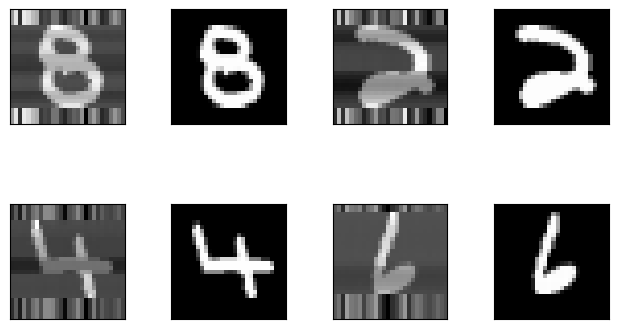

In [4]:
main()

Compare the input image(right) and output image(left), we find that there exist many noise. The loss function can't well decrease.

Then, we test input with vertical contact(112*7). In this setting, we divide original 28*28 image into 16 blocks(7*7), and assemble each block in vertical direction.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.472
epochs:[0],iteration:[250]/[1000],loss:1.308
epochs:[0],iteration:[500]/[1000],loss:1.339
epochs:[0],iteration:[750]/[1000],loss:1.359
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:1.367
epochs:[1],iteration:[250]/[1000],loss:1.308
epochs:[1],iteration:[500]/[1000],loss:1.339
epochs:[1],iteration:[750]/[1000],loss:1.359
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:1.366
epochs:[2],iteration:[250]/[1000],loss:1.308
epochs:[2],iteration:[500]/[1000],loss:1.339
epochs:[2],iteration:[750]/[1000],loss:1.359
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:1.366
epochs:[3],iteration:[250]/[1000],loss:1.308
epochs:[3],iteration:[500]/[1000],loss:1.339
epochs:[3],iteration:[750]/[1000],loss:1.359
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:1.366
epochs:[4],iteration:[250]/[1000],loss:1.308
epochs:[4],iteration:[500]/[1000],loss:1.339
epochs:[4],iteration:[750]/[1000],loss:1.359


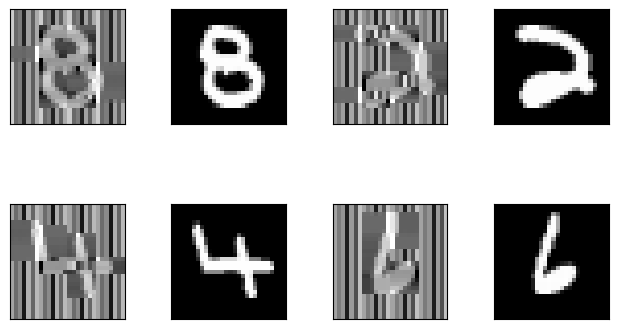

In [5]:
main(contact = True)

Compare the input image(right) and output image(left), we find that there exist many noise. The loss function can't well decrease.

Next, we test input with horizontal contact(7*112). In this setting, we divide original 28*28 image into 16 blocks(7*7), and assemble each block in horizontal direction.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.177
epochs:[0],iteration:[250]/[1000],loss:0.701
epochs:[0],iteration:[500]/[1000],loss:0.718
epochs:[0],iteration:[750]/[1000],loss:0.767
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.796
epochs:[1],iteration:[250]/[1000],loss:0.698
epochs:[1],iteration:[500]/[1000],loss:0.718
epochs:[1],iteration:[750]/[1000],loss:0.766
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.796
epochs:[2],iteration:[250]/[1000],loss:0.698
epochs:[2],iteration:[500]/[1000],loss:0.718
epochs:[2],iteration:[750]/[1000],loss:0.766
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.796
epochs:[3],iteration:[250]/[1000],loss:0.697
epochs:[3],iteration:[500]/[1000],loss:0.718
epochs:[3],iteration:[750]/[1000],loss:0.766
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.796
epochs:[4],iteration:[250]/[1000],loss:0.698
epochs:[4],iteration:[500]/[1000],loss:0.718
epochs:[4],iteration:[750]/[1000],loss:0.766


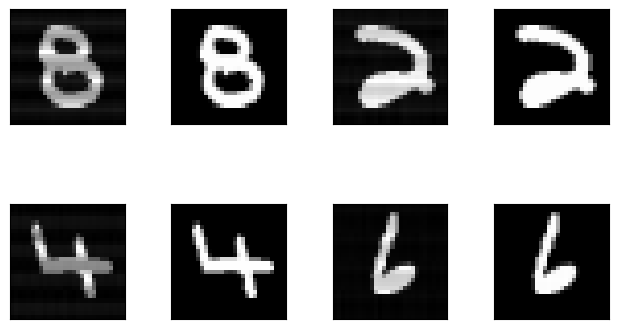

In [6]:
main(contact = True,col=False)

Compare the input image(right) and output image(left), we find that there still exist some noise. The loss function can't well converge.

Finally, we test input with contact of overlap blocks(7*448). In this setting, split operations are performed in two dimensions, using a window of size 7 and a stride of 3 for each split. Finally we will obtain 64 blocks(7*7) and vertical contact them. The ancillary part will be cut out after transformation.

The 1 th epoch is:
epochs:[0],iteration:[0]/[1000],loss:1.093
epochs:[0],iteration:[250]/[1000],loss:0.004
epochs:[0],iteration:[500]/[1000],loss:0.002
epochs:[0],iteration:[750]/[1000],loss:0.001
The 2 th epoch is:
epochs:[1],iteration:[0]/[1000],loss:0.001
epochs:[1],iteration:[250]/[1000],loss:0.002
epochs:[1],iteration:[500]/[1000],loss:0.001
epochs:[1],iteration:[750]/[1000],loss:0.001
The 3 th epoch is:
epochs:[2],iteration:[0]/[1000],loss:0.001
epochs:[2],iteration:[250]/[1000],loss:0.001
epochs:[2],iteration:[500]/[1000],loss:0.001
epochs:[2],iteration:[750]/[1000],loss:0.001
The 4 th epoch is:
epochs:[3],iteration:[0]/[1000],loss:0.001
epochs:[3],iteration:[250]/[1000],loss:0.001
epochs:[3],iteration:[500]/[1000],loss:0.000
epochs:[3],iteration:[750]/[1000],loss:0.001
The 5 th epoch is:
epochs:[4],iteration:[0]/[1000],loss:0.001
epochs:[4],iteration:[250]/[1000],loss:0.001
epochs:[4],iteration:[500]/[1000],loss:0.001
epochs:[4],iteration:[750]/[1000],loss:0.000


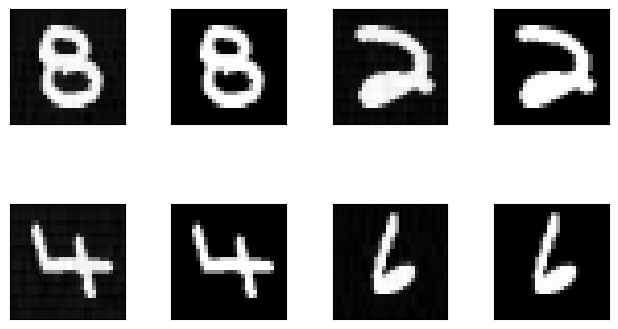

In [7]:
main(contact=True,col=False,overlap=True)

Compare the input image(right) and output image(left), we find that they are almost identical. The loss function converge very fast at first few iterations. The performance is the best.

## Conclusion

Based on four output, we can conclude that: divide by blocks can combine position information into dataset, and help improve performance；Compare to contact block vertically, contact block horizontally will show better performance; Compare to non-overlap block, overlap block converge faster in loss function and have better performance.
Compared with the results reported last time(reshape different input size of 28*28,4*196,1*784...), this result gives the same conclusion: for the input data (n*d), the larger d, the better the performance of the model.